# Used Car Sale Price Prediction

This notebook consist of data dataset which contains the features like Brand, Body, Engine, Mileage, Engine Type, Registration, Year and Model. Using this features we have to predict the Price of that car. The data cleaning, data preprocessing, data visualization and predictive modelling are done in this Notebook.

###### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

###### Importing the dataset

In [3]:
raw_data = pd.read_csv("Used Car Sale Price Prediction.csv")

In [4]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
raw_data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


### Preprocessing

###### Exploring the descriptive statistics of variable

In [6]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


From the above we can see that:
* **count-** How many records are there in each column, as this data contains lots of missing values, so there is a variability in the count.
* **unique-** unique indicates how many unique values are there in the categorical columns. We'll have to remove some because we're turning categorical values into dummy variables.
* **top and freq-** This indicates which is the top most entry and how many times it occured. Again we'll have to remove some.
* **mean, std, min, max, mode, quartile-** This indicates the mean, mode, minimum and maximum values. By observing this, we can detect the skewness of the data.
> Here our data is right skewed because here we observe there is a much more difference between mean and mode.

###### Determining the variables of intrest

In [7]:
data = raw_data.drop(['Model'], axis = 1)

We are dropping the 'Model' column because model column is categorical column and has 312 unique values. So we can't make 312 dummy variables while converting it to from categorical values. So dropping will be the easiest way for that.

###### Dealing with the missing values:

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

As we can see from the above Price has 172 missing values and EngineV has 150.

In [9]:
data_no_mv = data.dropna(axis=0)

In [10]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###### Exploring the Probability Distribution Function

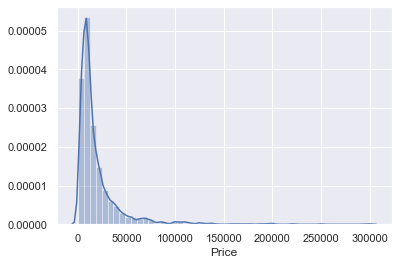

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

In [11]:
sns.distplot(data_no_mv['Price'])
plt.show()
data_no_mv['Price'].describe()

For optimum results we would be looking for a normal distribution. 
* Price has a mean of around dollor 19k
* minimum price of around dollor 600k
* 25% of prices are around dollor 7k
* median of around dollor 11.5k
* 75% are lower than dollor 21.9k 
* maximum of dollor 30k.

Looking at the distplot, we've outliers in the 'Price' column.

###### Dealing with outliers

In [12]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


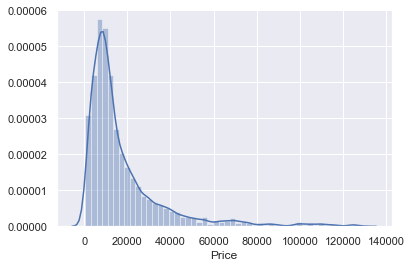

In [13]:
sns.distplot(data_1['Price'])
plt.show()

We have lowerd the distribution by taking the 99th percentile. Though our data is still distributed in the same way but with same outliers.

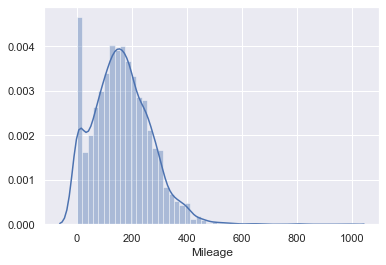

In [14]:
sns.distplot(data_no_mv['Mileage'])
plt.show()

Here also the situation is similar, for this we can take the values which are below the 99th percentile.

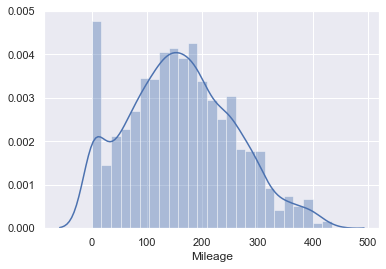

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])
plt.show()

So here's our data is somewhat distributed now in the Mileage column.

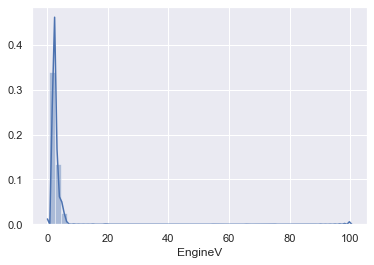

In [16]:
sns.distplot(data_no_mv['EngineV'])
plt.show()

Engine values fall between 0.6 and 6.5, but in our distribution, these values are going upto 100. Those values which are above 6.5, we are considering as missing values, hence we should remove it.

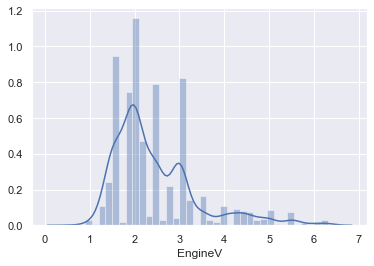

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])
plt.show()

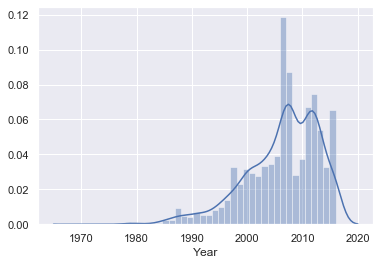

In [18]:
sns.distplot(data_no_mv['Year'])
plt.show()

The problem with year is its on the low end. Most cars are lower but there seems to be there are some vintage cars also.

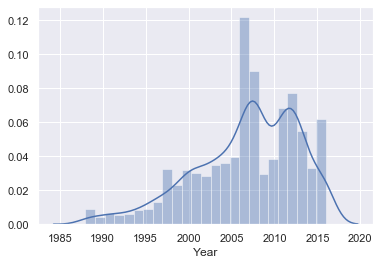

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])
plt.show()

In [20]:
data_4.tail(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
4333,Renault,7000.0,van,210,1.5,Diesel,yes,2005
4334,BMW,12090.0,hatch,145,1.6,Petrol,yes,2010
4335,BMW,27900.0,sedan,38,2.0,Petrol,yes,2013
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013


As we can see, the indices of the dataframe show all the dataincluding the observations we have removed. But we want to only descibe the data only for analysis. So we will reset the indexes to completely forget the old index.

In [21]:
data_cleaned = data_4.reset_index(drop=True)

In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Overall, we have deleted around 250 observations which are the problematic ones.

### Checking the OLS assumptions

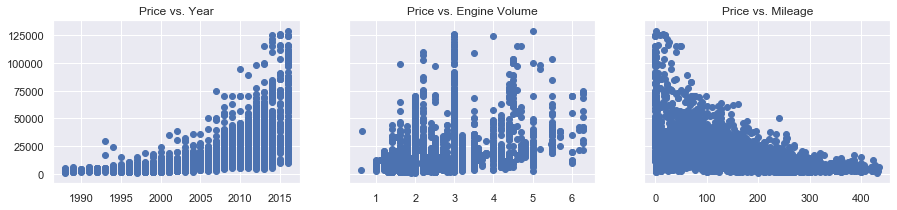

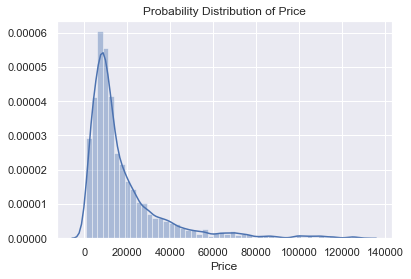

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(y=data_cleaned['Price'], x=data_cleaned['Year'])
ax1.set_title('Price vs. Year')
ax2.scatter(y=data_cleaned['Price'], x=data_cleaned['EngineV'])
ax2.set_title('Price vs. Engine Volume')
ax3.scatter(y=data_cleaned['Price'], x=data_cleaned['Mileage'])
ax3.set_title('Price vs. Mileage')
plt.show()

sns.distplot(data_cleaned['Price'])
plt.title('Probability Distribution of Price')
plt.show()

From the above scatterplots we can spot patters but definetly not the linear ones. So we should not run linear regression in this case. We should transform one or more variables. Because our target variable, i.e., Price is not normally distributed(as we can observe through the distlot of 'Price' column). So to make it linear, we can transform it into log transformation. Log transformation is exponentially useful for facing exponential relationships. It fulfills the condition of assumptions like Linearity and Homosedastisity.

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


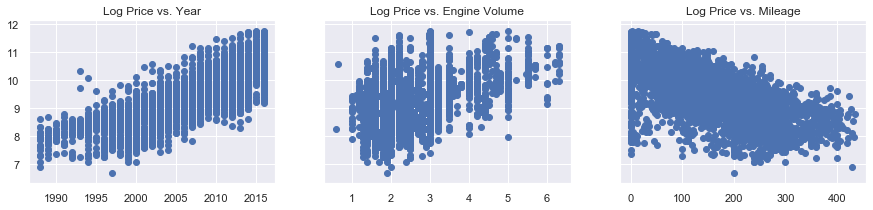

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(y=data_cleaned['Log Price'], x=data_cleaned['Year'])
ax1.set_title('Log Price vs. Year')
ax2.scatter(y=data_cleaned['Log Price'], x=data_cleaned['EngineV'])
ax2.set_title('Log Price vs. Engine Volume')
ax3.scatter(y=data_cleaned['Log Price'], x=data_cleaned['Mileage'])
ax3.set_title('Log Price vs. Mileage')
plt.show()

We can now see the linear pattern in all plots now.

In [26]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

* Normality is assumed for big sample which is following the Central Limit Theorem. 
* The zero mean of distribution of errors is accomplished o the inclusion of intercept
* As it is following the linear pattern it is satisfying the Homosedastisity test.
* The observations are not autocorrelated with each other because the data is not of time series data.

To check the multicollinearity, we can use VIF because it produces a measure which estimates how much larger the square root of standard error of an estimate is compared to where the variable is completely uncorrelated with other predictors.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


When VIF = 1: No Multicollinearity, its also the minimum value of the measure, though the values between 1 to 5 is considered okay. In our data, Year is too corelated with other variables because the VIF value is much more i.e. 10.

In [28]:
data_no_multicollinearity = data_cleaned.drop('Year', axis=1)

### Creating Dummy Variables

If we have N categories of features, we'll have to create N-1 dummies.

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


###### Rearranging the columns:

In [30]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [31]:
cols = ['Log Price','Mileage', 'EngineV',  'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression

###### Declaring the inputs and the targets

In [33]:
target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis=1)

###### Scaling our data

In [34]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

We've standardized all the input variables.

P.S.: Scaling has no affecton the predictive power of dummies, once scaled, they lose all their dummy meaning.

###### Splitting the data into train and test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state = 365)

###### Creating the Regression:

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_hat = reg.predict(X_train)

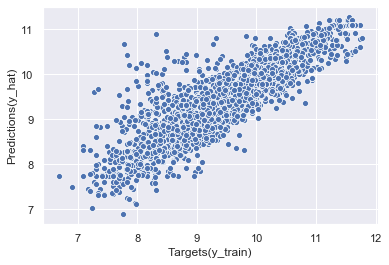

In [38]:
sns.scatterplot(y_train, y_hat)
plt.xlabel('Targets(y_train)')
plt.ylabel('Predictions(y_hat)')
plt.show()

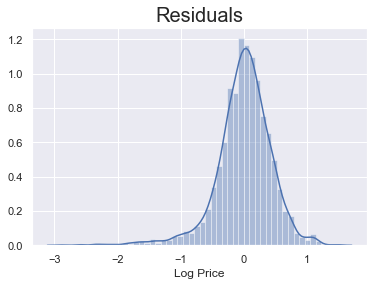

In [39]:
sns.distplot(y_train - y_hat)
plt.title('Residuals', size=20)
plt.show()

The residuals are the estimates of the errors, our residuals are normally distributed, mean seems to be zero but there's much longer tail in the negative side because, there are certain observations for which y_train - y_hat is much lower than the mean(a much higher price is predicted than the observed)

In [40]:
reg.score(X_train, y_train)

0.744996578792662

Our model is explaining the 74% of the variability.

###### Finding the weights and bias

The bias s contained in intercept, so finding intercept:

In [41]:
reg.intercept_

10.152496167606765

The weights are contained n coefficients

In [42]:
reg.coef_

array([-0.62881212,  0.26425439,  0.03873566,  0.0324979 , -0.52381377,
       -0.57111309, -0.18076831, -0.2173311 , -0.5882892 , -0.34486661,
       -0.41347478, -0.44050048, -0.46254013, -0.34320264, -0.21126668,
       -0.30601747,  1.1001902 ])

###### Summary of Regression:

In [43]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.628812
1,EngineV,0.264254
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


As we can see some weights are positive weights and others are negative weights.
* The bigger the weight, the bigger is the impact. In our case, Mileage has the most prominent impact.
* A positive weights shows that as a feature increases in value, so do the 'Log Price' and 'Price' respectively.
* A negative weight shows that as a feature increases in value, 'Log Price' and 'Price' decreases.
> For example, in the 'Mileage' column, more the car is driven, less will be the 'Price'
> The situation for dummies is bit different since we dropped one category for each discrete variable, when all included dummies are zero, then the dropped dummy is 1. Here in the brand table, we've dropped the 'Audi' brand, by this, whenever all other dummies are zero.
> Audi is 1, therefore Audi is the benchmark. If there are positive cofficients in weights of brand then that certain brand is more expensive than Audi. Here, BMW is little bit expensive than Audi because the coefficients are positive and vice versa.

* Dummies are not compared with other variables but only their respective benchmark.

### Testing

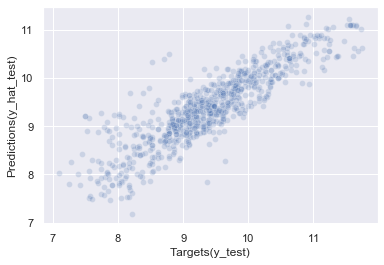

In [44]:
y_hat_test = reg.predict(X_test)

sns.scatterplot(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)')
plt.ylabel('Predictions(y_hat_test)')
plt.show()

For higher prices, we have higher concentration of values, therefore, our model is very good at predicting the higher price but for the lower prices, it is much more scattered. Our model is much more close to the 45 degree line. The more saturated the colors,the higher the concentration.

In [45]:
df_pf = pd.DataFrame(np.exp(y_hat_test).round(2), columns = ['Prediction'])
df_pf.head()

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [46]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.50,NaN
1,3499.26,7900.0
2,7553.29,NaN
3,7463.96,NaN
4,11353.49,NaN


In [47]:
y_test = y_test.reset_index(drop=True) # Resetting the original indexes
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: Log Price, dtype: float64

In [48]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.50,2300.0
1,3499.26,2800.0
2,7553.29,2500.0
3,7463.96,6400.0
4,11353.49,9150.0


In [49]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [50]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [51]:
df_pf.sort_values('Difference%')

,Prediction,Target,Residual,Difference%
698,30480.85,30500.0,19.15,0.062787
742,16960.31,16999.0,38.69,0.227602
60,12469.21,12500.0,30.79,0.246320
110,25614.14,25500.0,-114.14,0.447608
367,42703.68,42500.0,-203.68,0.479247
...,...,...,...,...
657,32481.05,6000.0,-26481.05,441.350833
162,9954.42,1800.0,-8154.42,453.023333
451,35956.50,6500.0,-29456.50,453.176923
532,10019.90,1800.0,-8219.90,456.661111


Some of the values of Residuals are -ve's, that means, their predictions are higher than the target. This is because, may be we're missing some important factors to our model.

**Conclusion:** We've got around 75% accuracy. On average our model is pretty decent at predicting the price of the car.